In this notebook, we will be analyzing a dataset related to factors that influence sleep quality, such as stress level, physical activity level, and Body Mass Index (BMI). The goal of this analysis is to explore the relationships between these factors and predict sleep disorders such as Sleep Apnea and Insomnia using machine learning algorithms.


**Steps we will follow:**

**Exploratory Data Analysis**:
Explore the relationships between variables using visualizations such as scatter plots and bar charts.
Check for missing values in the dataset and handle them.


**Building Machine Learning Models:**
Use classification algorithms like Random Forest, XGBoost to predict sleep disorders.


**Model Evaluation:**
Evaluate the models using accuracy, confusion matrix, and other performance metrics such as Precision and Recall.

**Conclusions:**
Analyze the results and provide recommendations based on the relationships between factors

**Project Goal:**
The goal of this project is to analyze the data using machine learning techniques to understand how various factors affect sleep quality and build a model that can predict sleep disorders based on input data.

In [8]:
!pip install kagglehub


In [1]:
import kagglehub

path = kagglehub.dataset_download("minahilfatima12328/lifestyle-and-sleep-patterns")

print("Path to dataset files:", path)

100%|██████████| 2.54k/2.54k [00:00<00:00, 756kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/minahilfatima12328/lifestyle-and-sleep-patterns/versions/1


In [10]:
import os

print(os.listdir(path))


['Sleep_health_and_lifestyle_dataset.csv']


In [35]:
import pandas as pd

data = pd.read_csv(os.path.join(path, 'Sleep_health_and_lifestyle_dataset.csv'))

data.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [13]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [14]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [27]:
activity_avg = data.groupby('Quality of Sleep')['Physical Activity Level'].mean()
activity_avg

,Physical Activity Level
Quality of Sleep,
4,30.800000
5,37.142857
6,54.580952
7,58.441558
8,69.174312
9,55.563380


In [31]:
sleep_disorder_counts = data['Sleep Disorder'].value_counts()
sleep_disorder_counts

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [32]:
bmi_category_counts = data['BMI Category'].value_counts()
bmi_category_counts


,count
BMI Category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


In [34]:
data_encoded = pd.get_dummies(data, columns=['Sleep Disorder'])

data_encoded.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,False,False
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,False,False
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,False,False
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,False,True
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,False,True


In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['BMI Category'] = label_encoder.fit_transform(data['BMI Category'])

data.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,3,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,0,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,0,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea


In [39]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('No Disorder')

data['Sleep Disorder'].value_counts()


,count
Sleep Disorder,
No Disorder,219
Sleep Apnea,78
Insomnia,77


In [68]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])

data['Occupation'] = label_encoder.fit_transform(data['Occupation'])

data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

print(data[['Gender', 'Occupation', 'Sleep Disorder']].head())


   Gender  Occupation  Sleep Disorder
0       1           9               1
1       1           1               1
2       1           1               1
3       1           6               2
4       1           6               2


In [71]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic Pressure', 'Diastolic Pressure'],
      dtype='object')

In [73]:
# تحقق من القيم في الأعمدة
print(data[['Systolic Pressure', 'Diastolic Pressure']].head())


   Systolic Pressure  Diastolic Pressure
0                126                  83
1                125                  80
2                125                  80
3                140                  90
4                140                  90


In [74]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,5,1,28,6,5.9,4,30,8,2,85,3000,2,140,90


In [75]:
# حساب المتوسط لمستوى التوتر حسب جودة النوم
stress_avg = data.groupby('Quality of Sleep')['Stress Level'].mean()
stress_avg


,Stress Level
Quality of Sleep,
4,8.000000
5,7.000000
6,7.580952
7,5.350649
8,4.605505
9,3.028169


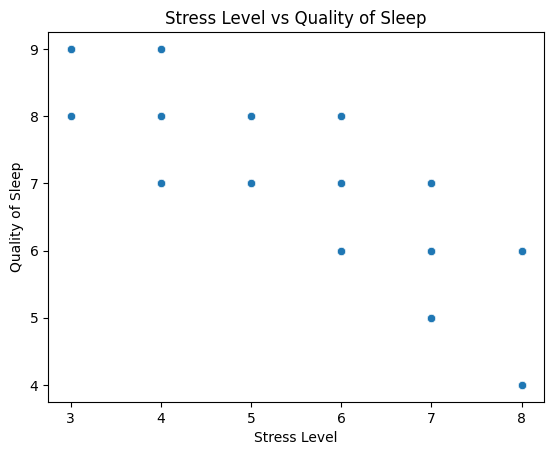

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=data)
plt.title('Stress Level vs Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()


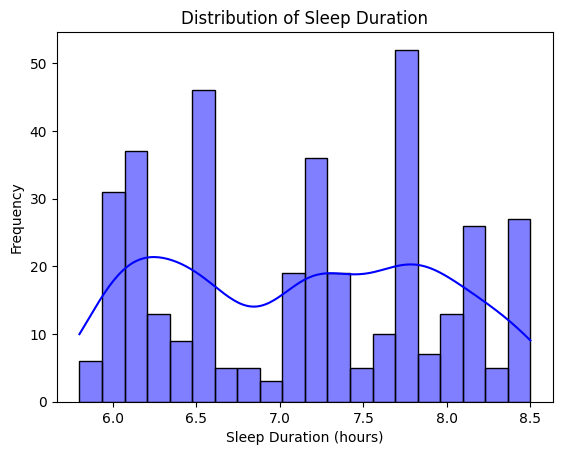

In [77]:
sns.histplot(data['Sleep Duration'], kde=True, color='blue', bins=20)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()


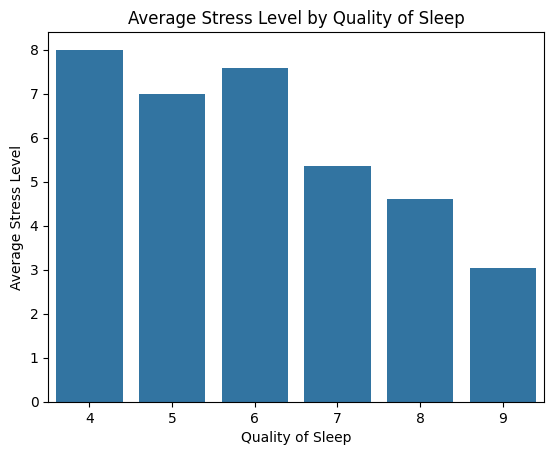

In [78]:
# رسم مخطط شريطي يوضح متوسط مستوى التوتر حسب جودة النوم
sns.barplot(x=stress_avg.index, y=stress_avg.values)
plt.title('Average Stress Level by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Average Stress Level')
plt.show()


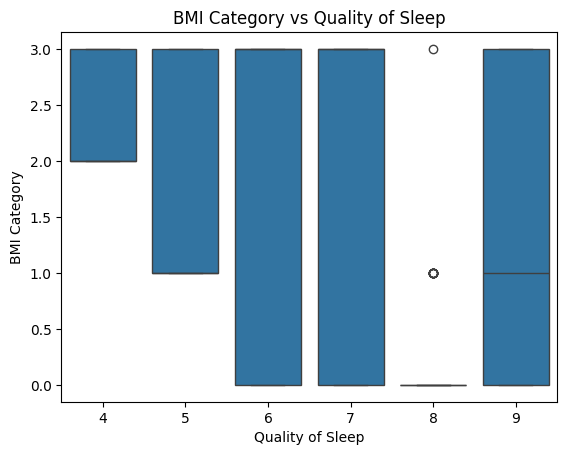

In [88]:
sns.boxplot(x='Quality of Sleep', y='BMI Category', data=data)
plt.title('BMI Category vs Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('BMI Category')
plt.show()


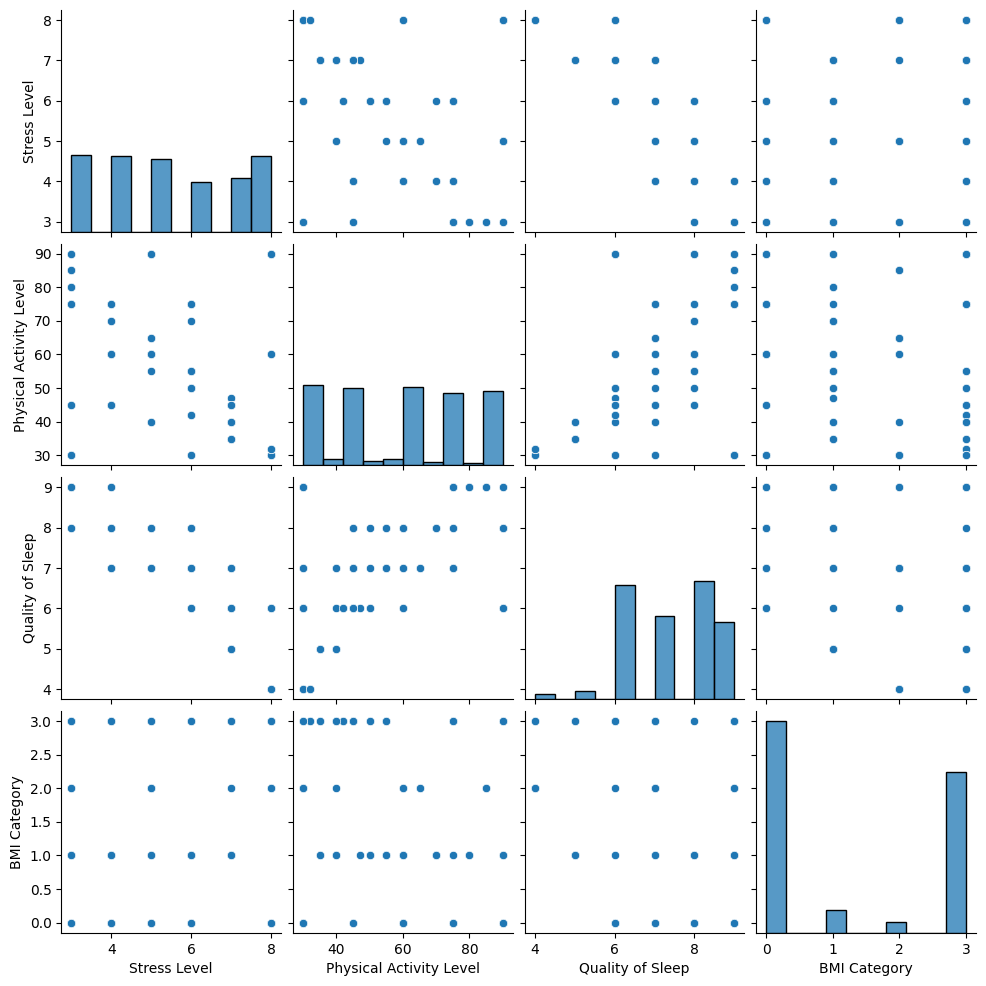

In [89]:
sns.pairplot(data[['Stress Level', 'Physical Activity Level', 'Quality of Sleep', 'BMI Category']])
plt.show()


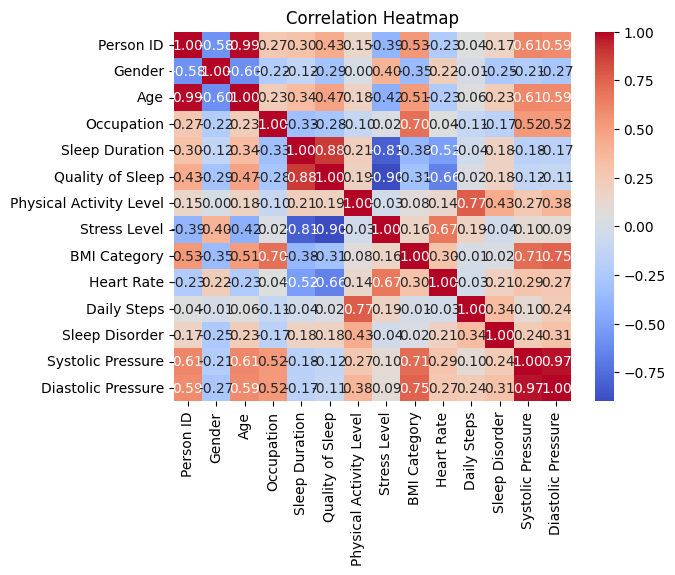

In [90]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113



In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data[['Stress Level', 'Physical Activity Level', 'BMI Category', 'Systolic Pressure', 'Diastolic Pressure']]
y = data['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data size: {X_train.shape[0]}")
print(f"Test data size: {X_test.shape[0]}")


Training data size: 261
Test data size: 113


In [80]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")


Accuracy of the model: 0.89


In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[20  2  2]
 [ 1 61  0]
 [ 5  2 20]]


In [82]:
from sklearn.metrics import classification_report

# عرض Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113



In [95]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [96]:
  import xgboost as xgb
  from sklearn.metrics import accuracy_score

  xgb_model = xgb.XGBClassifier()
  xgb_model.fit(X_train, y_train)


  y_pred_xgb = xgb_model.predict(X_test)

  accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
  print(f"  XGBoost: {accuracy_xgb:.2f}")


  XGBoost: 0.89
